In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
train_data=pd.read_csv('train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
##Hedef değişkenimiz Survived:
###0:Ölenler
###1:Hayatta Kalanlar
##SibSp: Titanik’teki kardeş/eş sayısı
##Parch: Titanik’teki ebeveynlerin/çocukların sayısı
###Fare: Bilet fiyatları
###Cabin: Kabin numarası
###Embarked: Biniş limanı

In [7]:
# Korelasyon analizi
# Korelasyon: İki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Exploratory Data Analysis

<AxesSubplot:>

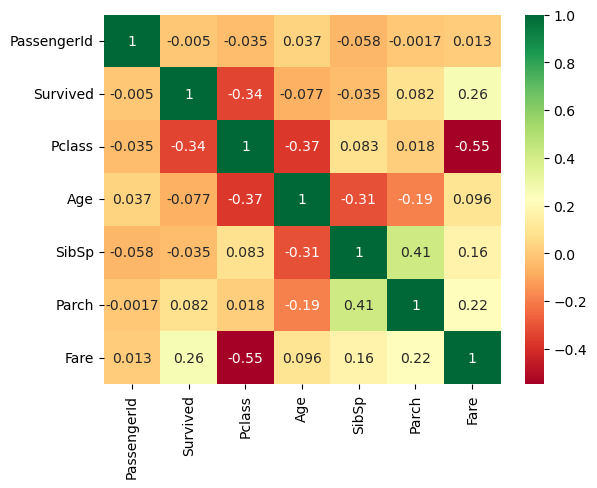

In [8]:
sns.heatmap(train_data.corr(),annot=True, cmap='RdYlGn')

In [9]:
#"Survived" ve "Fare" arasında 0.26'lık pozitif bir korelasyon olduğu görülmektedir. 
#Bilet parası ve hayatta kalma doğrusal bir ilişkiye bağlanmaktadır. 
#Bilet fiyatı arttıkça hayatta kalma olasılığı da artmaktadır.
#"Survived" ve "Pclass" arasında 0.34'lük negatif bir korelasyon olduğu görülmektedir. 
#Yani Pclass düştükçe hayatta kalma oranı artmaktadır. 
#Bu da 1. sınıf yolcuların 2. ve 3. sınıf yolculardan daha şanslı olduğunu göstermektedir.

male      577
female    314
Name: Sex, dtype: int64


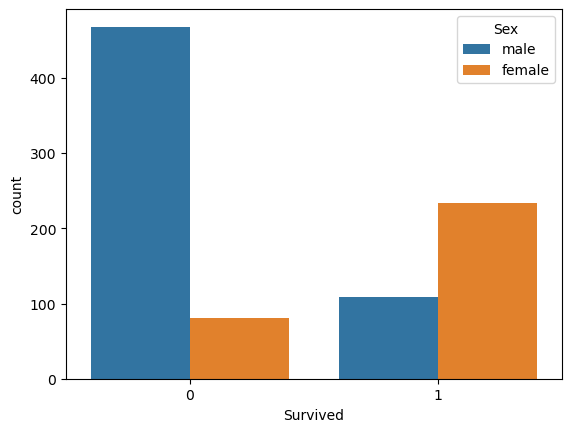

In [10]:
sns.countplot(x='Survived',data=train_data, hue='Sex')
print(train_data.Sex.value_counts())

C:\Users\numan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


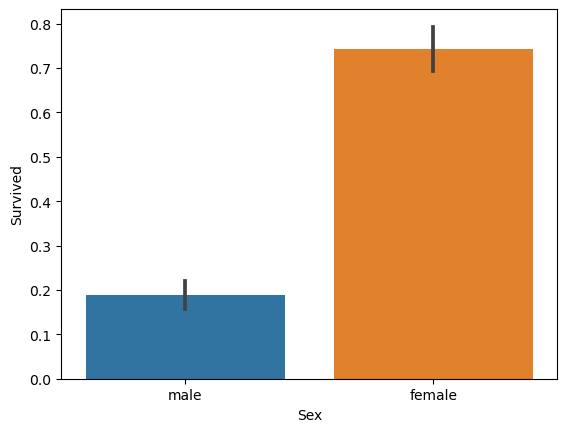

In [11]:
sns.barplot(train_data['Sex'], train_data['Survived']);

C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\numan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


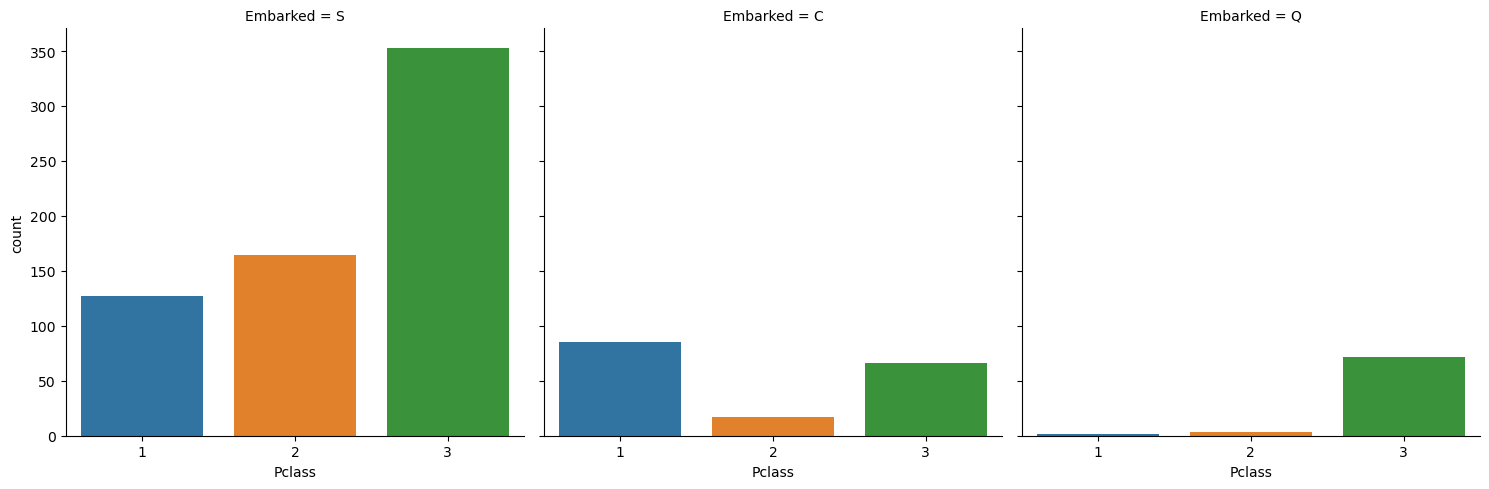

In [12]:
sns.factorplot('Pclass', col='Embarked', data= train_data, kind='count')

Text(0, 0.5, 'Survival Probability')

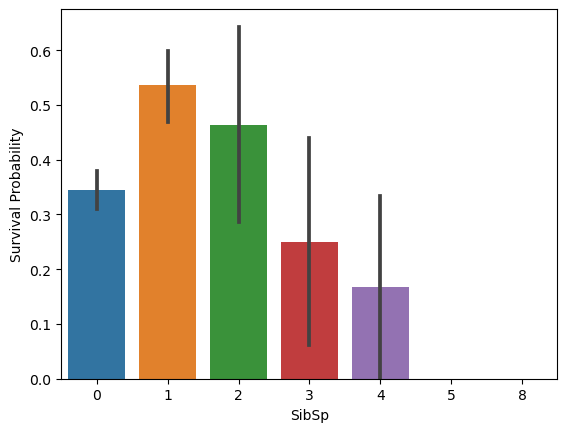

In [13]:
sns.barplot(x='SibSp',y='Survived', data=train_data)
plt.ylabel('Survival Probability')

Text(0, 0.5, 'Survival Probability')

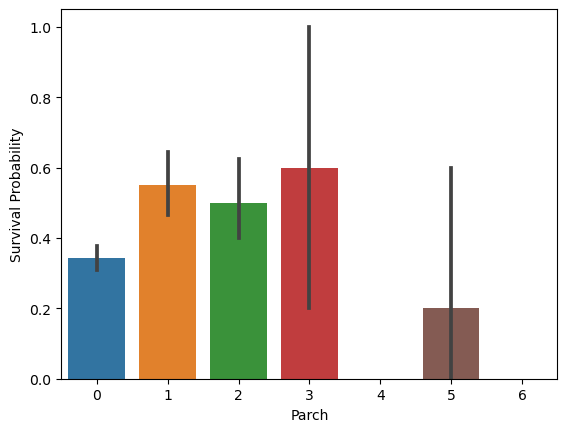

In [14]:
sns.barplot(x='Parch',y='Survived', data=train_data)
plt.ylabel('Survival Probability')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

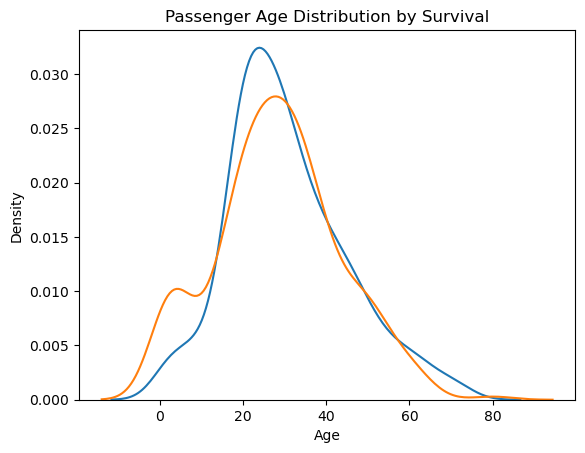

In [15]:
sns.kdeplot(train_data['Age'][train_data['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train_data['Age'][train_data['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

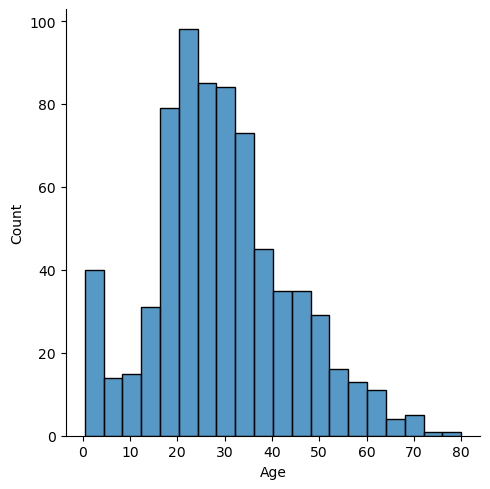

In [16]:
sns.displot(train_data['Age'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

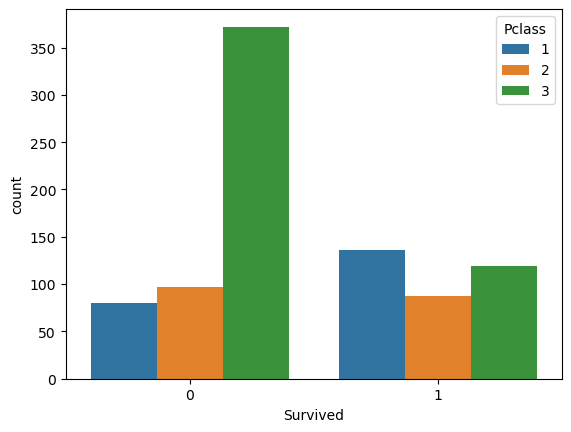

In [17]:
sns.countplot(x='Survived',data=train_data, hue='Pclass')

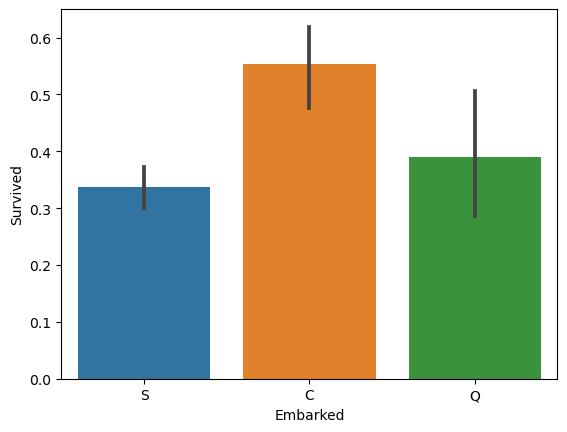

In [18]:
sns.barplot(data=train_data, x='Embarked', y='Survived')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()


In [19]:
# Age sütununda ki eksik değerleri veri setinin yaş ortalaması ile dolduruyoruz.
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

male      58
female    55
Name: Sex, dtype: int64


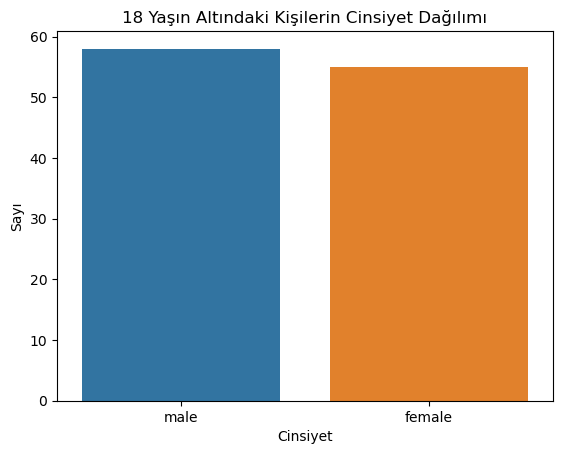

In [20]:

underage = train_data[train_data['Age'] < 18]

# Female (kadın) ve male (erkek) sayılarını hesapla
gender_counts = underage['Sex'].value_counts()

print(gender_counts)

# Cinsiyet dağılımını görselleştir
sns.countplot(data=underage, x='Sex')
plt.xlabel('Cinsiyet')
plt.ylabel('Sayı')
plt.title('18 Yaşın Altındaki Kişilerin Cinsiyet Dağılımı')
plt.show()

In [21]:
# Embarked sütununda ki eksik değerleri en çok kullanılan ile dolduruyoruz.
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [22]:
train_data.drop('Cabin',axis=1, inplace=True)

In [23]:
train_data.drop(['PassengerId','Ticket'],axis=1, inplace=True)

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [25]:
train_data[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [26]:
train_data[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
train_data[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Embarked', ascending=True)
#Embarked -> Gemiye biniş limanı, C:Cherbourg / S:Southampton / Q:Queenstown

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [28]:
train_data[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass']).mean().sort_values(by='Survived', ascending=False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

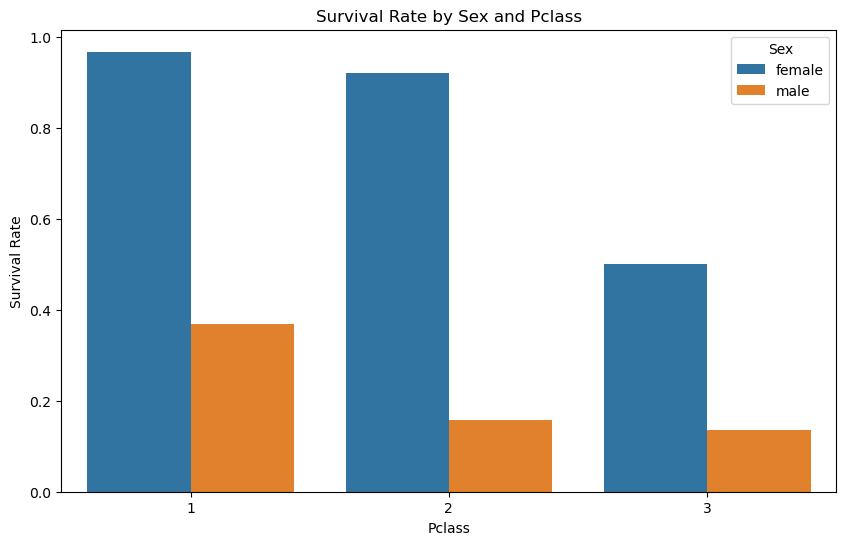

In [29]:
grouped_data = train_data[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass']).mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=grouped_data)
plt.title('Survival Rate by Sex and Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()


In [30]:
def barPlot(feature):
    
    temp = train_data[feature]
    tempValue = temp.value_counts()
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(tempValue.index, tempValue)
    plt.xticks(tempValue.index, tempValue.index.values)
    plt.ylabel("Sıklık")
    plt.title(feature)
    plt.show()
    print("{}: \n {}".format(feature, tempValue))

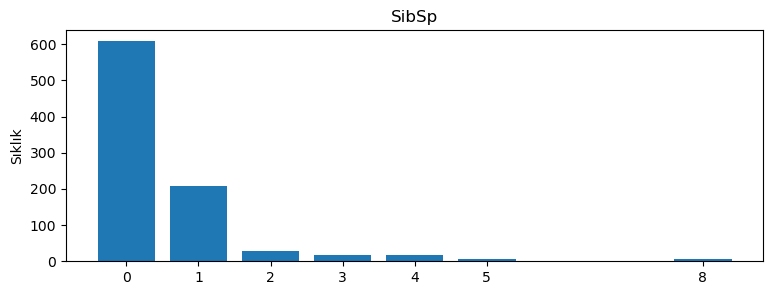

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


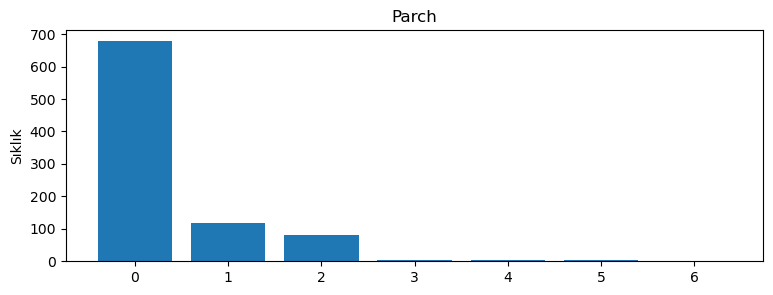

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [31]:
category = ["SibSp","Parch"]
for c in category:
    barPlot(c)

In [32]:
train_data[['Fare','Survived']].groupby(['Fare']).mean().sort_values(by='Survived', ascending=False)

,Survived
Fare,
512.3292,1.0
57.9792,1.0
13.8583,1.0
13.7917,1.0
13.4167,1.0
...,...
15.5500,0.0
47.1000,0.0
46.9000,0.0


In [33]:
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [34]:
train_data[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [35]:
# Cinsiyetlere göre yaş ortalamaları

train_data.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [36]:

# Hayatta kalanların yaş ortalaması
survived_mean_age = train_data[train_data["Survived"] == 1]["Age"].mean()

print("Hayatta kalanların yaş ortalaması:", survived_mean_age)


Hayatta kalanların yaş ortalaması: 28.54977812177503


In [37]:
# Hayatta kalmayanların yaş ortalaması
survived_mean_age = train_data[train_data["Survived"] == 0]["Age"].mean()

print("Hayatta kalmayanların yaş ortalaması:", survived_mean_age)

Hayatta kalmayanların yaş ortalaması: 30.415099646415896


In [38]:
# Hayatta kalan kadınların yaş ortalaması
survived_female_mean_age = train_data[(train_data["Survived"] == 1) & (train_data["Sex"] == "female")]["Age"].mean()

print("Hayatta kalan kadınların yaş ortalaması:", survived_female_mean_age)


Hayatta kalan kadınların yaş ortalaması: 28.979262812421116


In [39]:

# Hayatta kalan erkeklerin yaş ortalaması
survived_male_mean_age = train_data[(train_data["Survived"] == 1) & (train_data["Sex"] == "male")]["Age"].mean()

print("Hayatta kalan erkeklerin yaş ortalaması:", survived_male_mean_age)


Hayatta kalan erkeklerin yaş ortalaması: 27.63170534268753


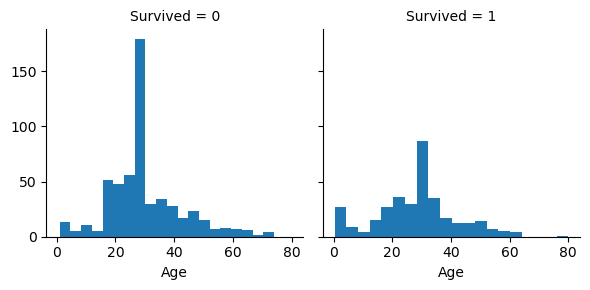

In [40]:
SurvAge = sns.FacetGrid(train_data, col="Survived")
SurvAge.map(plt.hist, 'Age', bins=20)

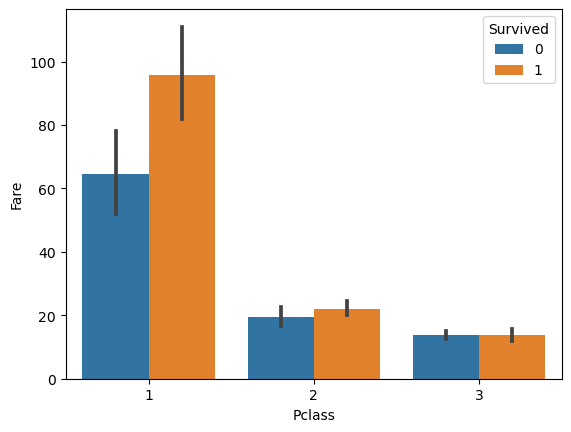

In [41]:
sns.barplot(data=train_data, x='Pclass', y='Fare', hue='Survived')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

In [42]:
test_data=pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
test_data.shape

(418, 11)

In [44]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
# Age sütununda ki eksik değerleri veri setinin yaş ortalaması ile dolduruyoruz.
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [46]:
test_data.drop(['PassengerId','Ticket','Cabin'],axis=1, inplace=True)

In [47]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [48]:
test_data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data Processing

In [49]:
titanic_data=pd.concat([train_data,test_data], axis=0).reset_index(drop=True)
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,30.27259,0,0,8.0500,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,108.9000,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,7.2500,S
1307,NaN,3,"Ware, Mr. Frederick",male,30.27259,0,0,8.0500,S


In [50]:
titanic_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1304,NaN,3,"Spector, Mr. Woolf",male,30.27259,0,0,8.0500,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,108.9000,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,7.2500,S
1307,NaN,3,"Ware, Mr. Frederick",male,30.27259,0,0,8.0500,S
1308,NaN,3,"Peter, Master. Michael J",male,30.27259,1,1,22.3583,C


In [51]:
titanic_data.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [52]:
label = preprocessing.LabelEncoder() 

titanic_data['Sex'] = label.fit_transform(titanic_data['Sex'])
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

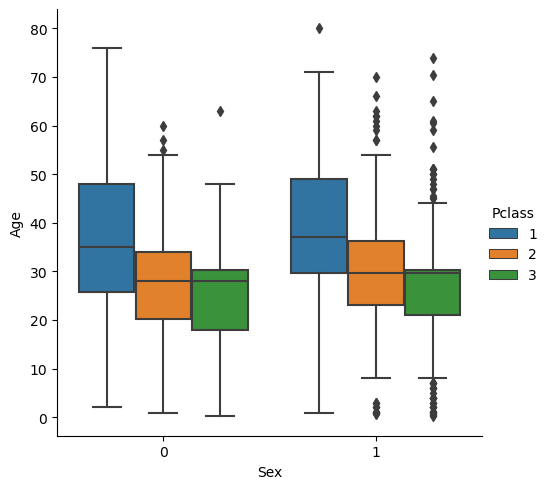

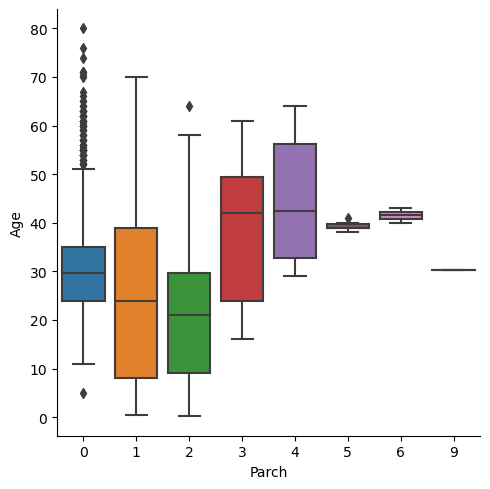

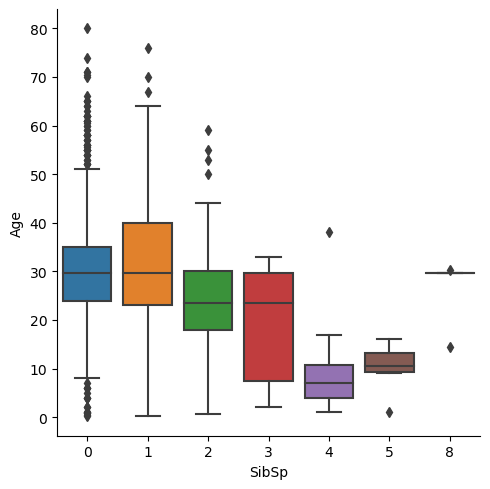

In [53]:
sns.factorplot(y='Age', x='Sex', hue='Pclass', kind='box', data=titanic_data)
sns.factorplot(y='Age', x='Parch', kind='box', data=titanic_data)
sns.factorplot(y='Age', x='SibSp', kind='box', data=titanic_data)

In [54]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   int32  
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 87.1+ KB


C:\Users\numan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Passenger Fare Distribution')

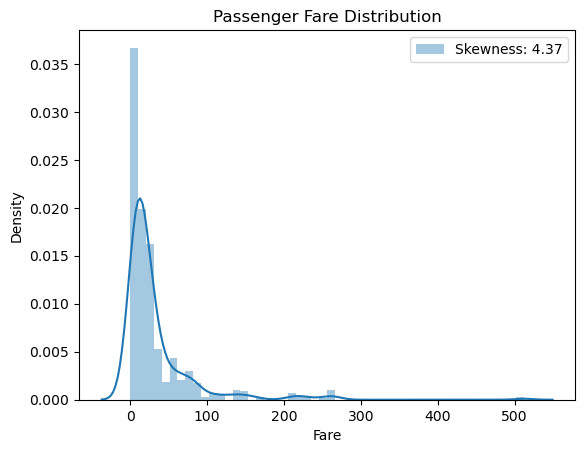

In [55]:
sns.distplot(titanic_data['Fare'], label = 'Skewness: %.2f'%(titanic_data['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [56]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [57]:
titanic_data[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [58]:
titanic_data['IsAlone'] = 0
titanic_data.loc[titanic_data['FamilySize'] == 1, 'IsAlone'] = 1
titanic_data[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [59]:
titanic_data = titanic_data.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,0
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,0
4,0.0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,1


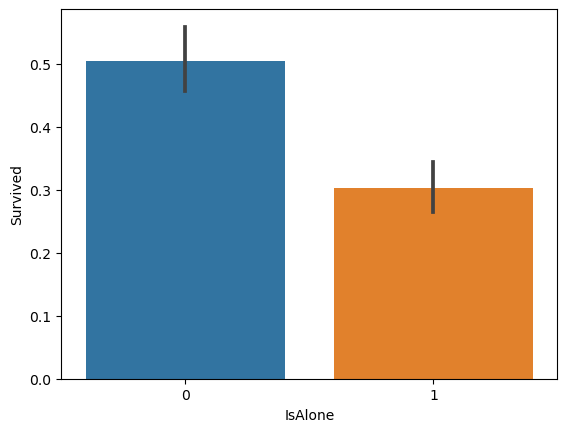

In [60]:
sns.barplot(data=titanic_data, x='IsAlone', y='Survived')
plt.xlabel('IsAlone')
plt.ylabel('Survived')
plt.show()

In [61]:
titanic_data['AgeBand'] = pd.cut(titanic_data['Age'], 5) 
titanic_data[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.344168
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [62]:
titanic_data.loc[titanic_data['Age'] <= 16.136, 'Age'] = 0
titanic_data.loc[(titanic_data['Age'] > 16.136) & (titanic_data['Age'] <= 32.102), 'Age'] = 1
titanic_data.loc[(titanic_data['Age'] > 32.102) & (titanic_data['Age'] <= 48.068), 'Age'] = 2
titanic_data.loc[(titanic_data['Age'] > 48.068) & (titanic_data['Age'] <= 64.034), 'Age'] = 3
titanic_data.loc[titanic_data['Age'] > 64.034 , 'Age'] = 4

In [63]:
titanic_data = titanic_data.drop('AgeBand', axis = 1)

C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(9.444444444444445, 0.5, 'Survival Probability')

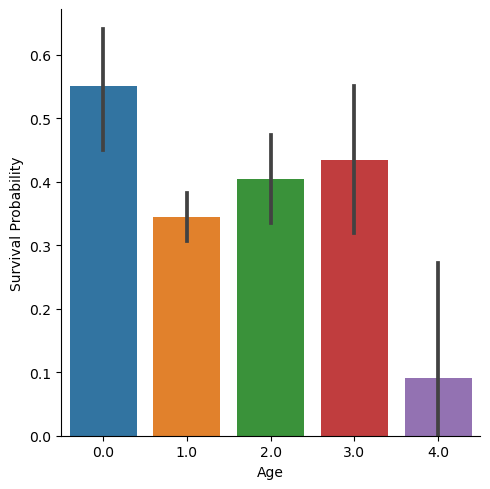

In [64]:
sns.factorplot(x = 'Age', y = 'Survived', data = titanic_data, kind = 'bar')
plt.ylabel('Survival Probability')

In [65]:
titanic_data[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [66]:
titanic_data['Age'] = titanic_data['Age'].astype('int')
titanic_data['Age'].dtype
titanic_data['Age*Class'] = titanic_data['Age'] * titanic_data['Pclass']
titanic_data[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [67]:
titanic_data['Title'] = [name.split(',')[1].split('.')[0].strip() for name in titanic_data['Name']]
titanic_data[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [68]:
titanic_data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [69]:
titanic_data['Title'].nunique()

18

In [70]:
titanic_data['Title'] = titanic_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
titanic_data['Title'] = titanic_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')

C:\Users\numan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Title', ylabel='count'>

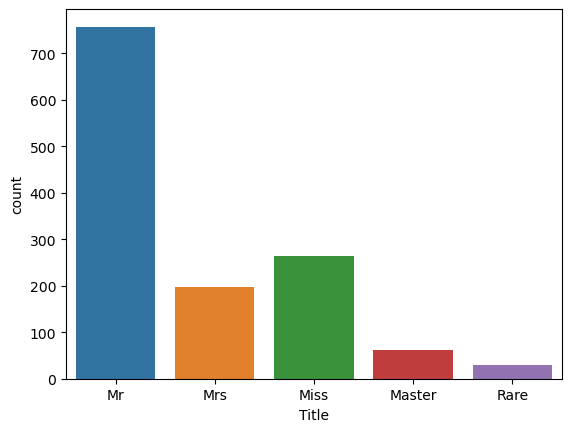

In [71]:
sns.countplot(titanic_data['Title'])

In [72]:
titanic_data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Mean of survival by Title')

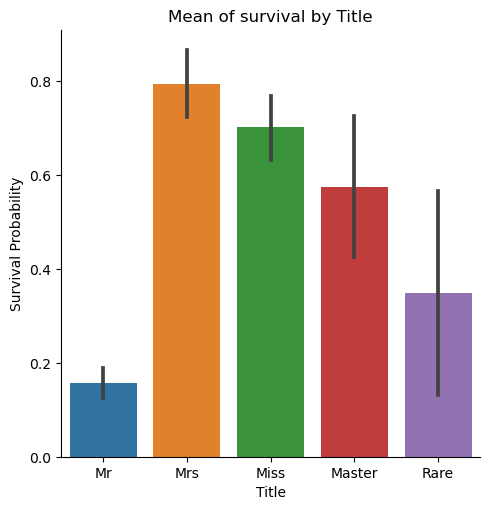

In [73]:
sns.factorplot(x = 'Title', y = 'Survived', data = titanic_data, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(9.444444444444445, 0.5, 'Survival Probability')

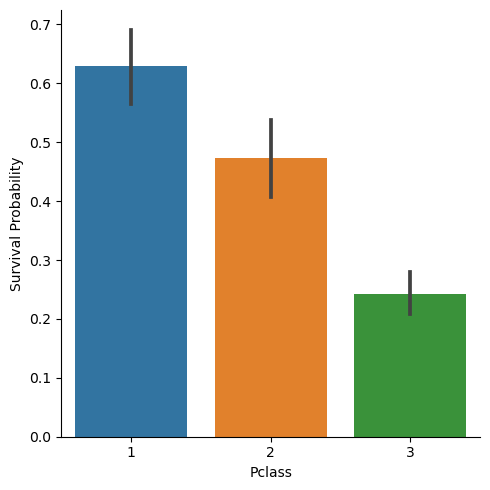

In [74]:
sns.factorplot(x = 'Pclass', y = 'Survived', data = titanic_data, kind = 'bar')
plt.ylabel('Survival Probability')


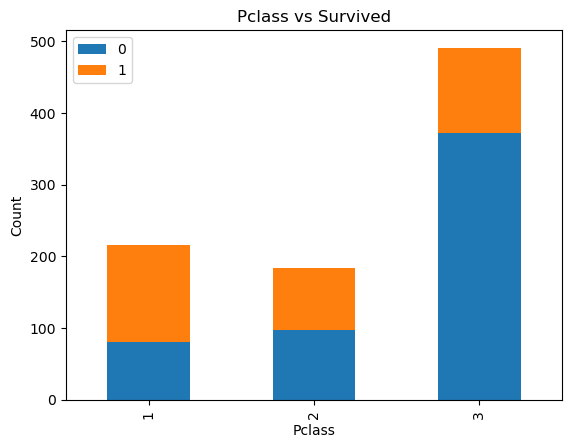

In [75]:

grouped_pclass = titanic_data.groupby(['Pclass', 'Survived']).size().unstack()
grouped_pclass.plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass vs Survived')
plt.legend(['0', '1'])
plt.show()


In [76]:
titanic_data = titanic_data.drop('Name', axis = 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class,Title
0,0.0,3,1,1,7.2500,S,0,3,Mr
1,1.0,1,0,2,71.2833,C,0,2,Mrs
2,1.0,3,0,1,7.9250,S,1,3,Miss
3,1.0,1,0,2,53.1000,S,0,2,Mrs
4,0.0,3,1,2,8.0500,S,1,6,Mr


In [77]:
# Encode Title feature
titanic_data = pd.get_dummies(titanic_data, columns = ['Title'])
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.0,3,1,1,7.2500,S,0,3,0,0,1,0,0
1,1.0,1,0,2,71.2833,C,0,2,0,0,0,1,0
2,1.0,3,0,1,7.9250,S,1,3,0,1,0,0,0
3,1.0,1,0,2,53.1000,S,0,2,0,0,0,1,0
4,0.0,3,1,2,8.0500,S,1,6,0,0,1,0,0


In [78]:
# Embarked - One-Hot Encoding
titanic_data = pd.get_dummies(titanic_data, columns = ['Embarked'])
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,1,1,7.2500,0,3,0,0,1,0,0,0,0,1
1,1.0,1,0,2,71.2833,0,2,0,0,0,1,0,1,0,0
2,1.0,3,0,1,7.9250,1,3,0,1,0,0,0,0,0,1
3,1.0,1,0,2,53.1000,0,2,0,0,0,1,0,0,0,1
4,0.0,3,1,2,8.0500,1,6,0,0,1,0,0,0,0,1


In [79]:
titanic_data['FareBand'] = pd.cut(titanic_data['Fare'], 4)
titanic_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [80]:
titanic_data.loc[titanic_data['Fare'] <= 128.082, 'Fare'] = 0
titanic_data.loc[(titanic_data['Fare'] > 128.082) & (titanic_data['Fare'] <= 256.165), 'Fare'] = 1
titanic_data.loc[(titanic_data['Fare'] > 256.165) & (titanic_data['Fare'] <= 384.247), 'Fare'] = 2
titanic_data.loc[titanic_data['Fare'] > 384.247, 'Fare'] = 3

In [81]:
titanic_data['Fare'] = titanic_data['Fare'].astype('int')

In [82]:
titanic_data = titanic_data.drop('FareBand', axis = 1)

In [83]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,1,1,0,0,3,0,0,1,0,0,0,0,1
1,1.0,1,0,2,0,0,2,0,0,0,1,0,1,0,0
2,1.0,3,0,1,0,1,3,0,1,0,0,0,0,0,1
3,1.0,1,0,2,0,0,2,0,0,0,1,0,0,0,1
4,0.0,3,1,2,0,1,6,0,0,1,0,0,0,0,1


In [84]:
#Train-test split, kısaca bir veri kümesini eğitim ve test veri setlerine ayırma işlemidir. 
#Bu işlem, makine öğrenimi ve veri madenciliği gibi alanlarda yaygın olarak kullanılan bir yöntemdir. 
#Temel amacı, bir modelin eğitim veri seti üzerinde öğrenmesini sağlamak ve daha sonra bu modeli test veri seti üzerinde değerlendirmektir.

train = titanic_data[:len(train_data)]
test = titanic_data[len(train_data):]

In [85]:
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,1,1,0,0,3,0,0,1,0,0,0,0,1
1,1.0,1,0,2,0,0,2,0,0,0,1,0,1,0,0
2,1.0,3,0,1,0,1,3,0,1,0,0,0,0,0,1
3,1.0,1,0,2,0,0,2,0,0,0,1,0,0,0,1
4,0.0,3,1,2,0,1,6,0,0,1,0,0,0,0,1


In [86]:
train['Survived'] = train['Survived'].astype('int')
train.head()

C:\Users\numan\AppData\Local\Temp\ipykernel_10432\3243491035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Survived'] = train['Survived'].astype('int')


,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,0,3,0,0,1,0,0,0,0,1
1,1,1,0,2,0,0,2,0,0,0,1,0,1,0,0
2,1,3,0,1,0,1,3,0,1,0,0,0,0,0,1
3,1,1,0,2,0,0,2,0,0,0,1,0,0,0,1
4,0,3,1,2,0,1,6,0,0,1,0,0,0,0,1


In [87]:
test.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
891,NaN,3,1,2,0,1,6,0,0,1,0,0,0,1,0
892,NaN,3,0,2,0,0,6,0,0,0,1,0,0,0,1
893,NaN,2,1,3,0,1,6,0,0,1,0,0,0,1,0
894,NaN,3,1,1,0,1,3,0,0,1,0,0,0,0,1
895,NaN,3,0,1,0,0,3,0,0,0,1,0,0,0,1


In [88]:
test = test.drop('Survived', axis = 1)
test.head()

,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
891,3,1,2,0,1,6,0,0,1,0,0,0,1,0
892,3,0,2,0,0,6,0,0,0,1,0,0,0,1
893,2,1,3,0,1,6,0,0,1,0,0,0,1,0
894,3,1,1,0,1,3,0,0,1,0,0,0,0,1
895,3,0,1,0,0,3,0,0,0,1,0,0,0,1


# Modelling

In [89]:
#Split Training Data

X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (891, 14)
Y_train shape:  (891,)
X_test shape:  (418, 14)


In [90]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.26

In [91]:
#K-nearest neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

C:\Users\numan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\numan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

83.5

In [92]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.51

In [93]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.51

In [94]:
#Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

76.32

In [95]:
#Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\numan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


80.7

In [96]:
# XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgb_acc = round(xgb.score(X_train, Y_train) * 100, 2)
xgb_acc

84.51

# Model Evaluation

In [97]:
models = pd.DataFrame({'Model': ['Logistic Regression','KNN','Decision Tree','Random Forest','Perceptron','Linear SVC','XGBClassifier'],
                                
                       'Score': [acc_log,acc_knn,acc_decision_tree,acc_random_forest,acc_perceptron,acc_linear_svc,xgb_acc]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Decision Tree,84.51
1,Random Forest,84.51
2,XGBClassifier,84.51
3,KNN,83.50
4,Logistic Regression,81.26
5,Linear SVC,80.70
6,Perceptron,76.32


In [98]:
#K-fold cross validation

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(XGBClassifier())

len(classifiers)

7

In [99]:

from sklearn.model_selection import cross_val_score

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

C:\Users\numan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\numan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [100]:
# Her sınıflandırıcı için çapraz doğrulama sonuçlarının ortalama ve standart sapması

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [101]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression','KNN','Decision Tree','Random Forest','Perceptron','Linear SVC','XGBClassifier']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.805880,0.040888,XGBClassifier
1,0.802572,0.044325,KNN
2,0.800325,0.044794,Linear SVC
3,0.800287,0.038103,Logistic Regression
4,0.800262,0.036952,Perceptron
5,0.799139,0.030462,Random Forest
6,0.610699,0.167920,Decision Tree


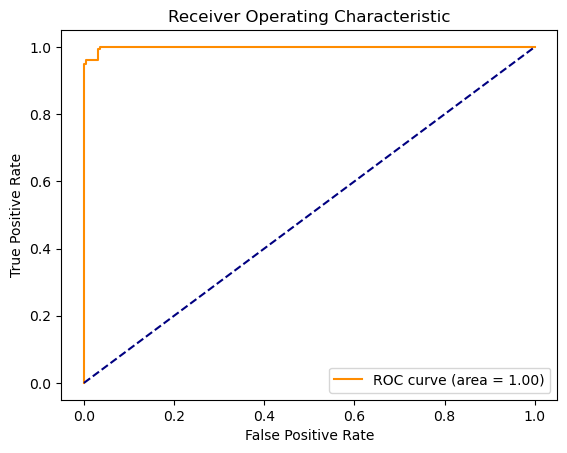

AUC: 0.998764534883721


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Modeli eğitme
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Sınıflama olasılıklarını alma
Y_prob = logreg.predict_proba(X_test)[:, 1]

# ROC eğrisini ve AUC'yi hesaplama
fpr, tpr, thresholds = roc_curve(Y_pred, Y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizdirme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)


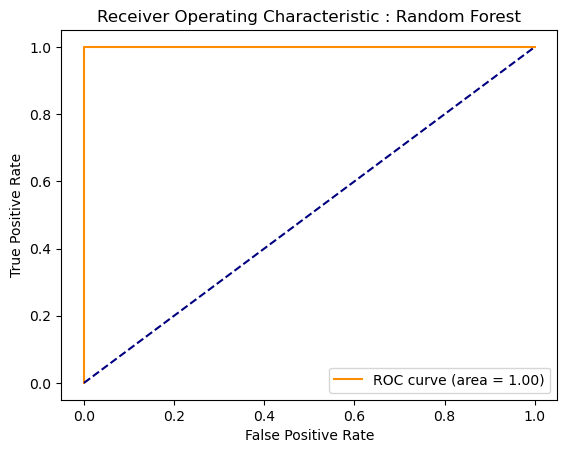

AUC: 1.0


In [103]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)


# Sınıflama olasılıklarını alma
Y_prob = random_forest.predict_proba(X_test)[:, 1]

# ROC eğrisini ve AUC'yi hesaplama
fpr, tpr, thresholds = roc_curve(Y_pred, Y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizdirme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic : Random Forest')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

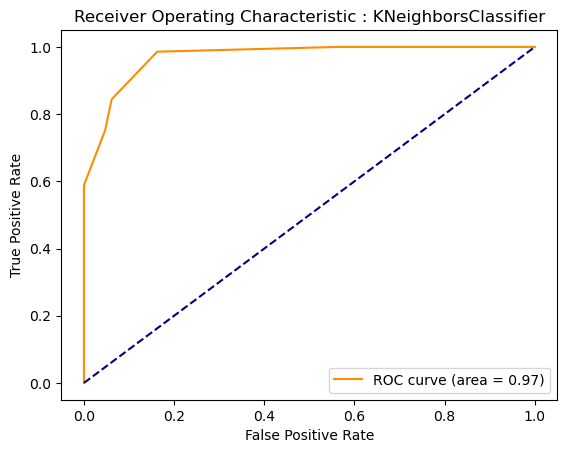

AUC: 0.970158998386973


In [104]:
# Modeli eğitme
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

# Sınıflama olasılıklarını alma
Y_prob = knn.predict_proba(X_test)[:, 1]

# ROC eğrisini ve AUC'yi hesaplama
fpr, tpr, thresholds = roc_curve(Y_pred, Y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizdirme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic : KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)


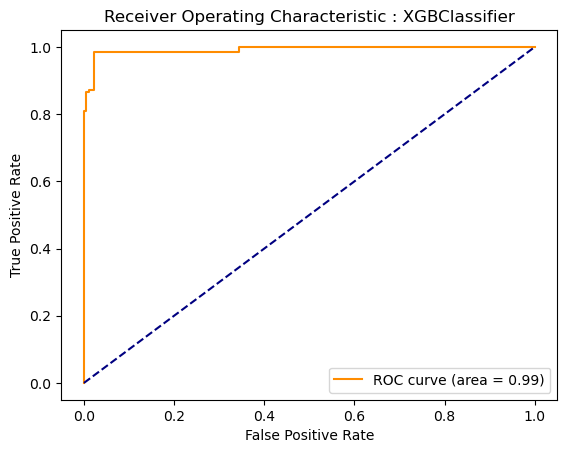

AUC: 0.992395729318688


In [105]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
# Sınıflama olasılıklarını alma
Y_prob = xgb.predict_proba(X_test)[:, 1]

# ROC eğrisini ve AUC'yi hesaplama
fpr, tpr, thresholds = roc_curve(Y_pred, Y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizdirme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic : XGBClassifier')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)


C:\Users\numan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


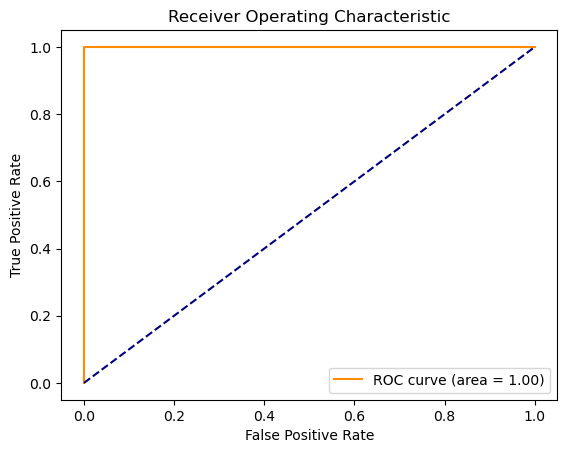

AUC: 1.0


In [106]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Modeli eğitme
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

# Sınıf tahminleri yapma
Y_pred = linear_svc.predict(X_test)

# Tahminlerin doğruluk olasılıklarını hesaplama
Y_scores = linear_svc.decision_function(X_test)

# ROC eğrisini ve AUC'yi hesaplama
fpr, tpr, thresholds = roc_curve(Y_pred, Y_scores)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizdirme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)


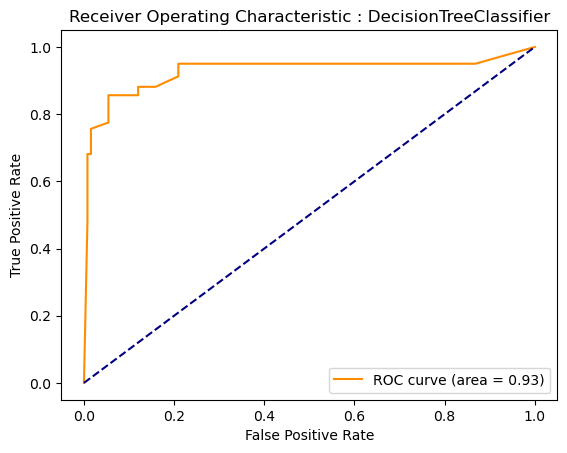

AUC: 0.9270469961240311


In [107]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_prob = decision_tree.predict_proba(X_test)[:, 1]

# ROC eğrisini ve AUC'yi hesaplama
fpr, tpr, thresholds = roc_curve(Y_pred, Y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizdirme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic : DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

In [108]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

# Complete Model Training with Full Data

In [109]:
model = XGBClassifier()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Test Submission

In [110]:
test_sub=pd.read_csv('gender_submission.csv')
test_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [111]:
test_sub.shape

(418, 2)

In [112]:
test_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [113]:
test_sub['Survived'] = Y_pred
test_sub['Survived'] = test_sub['Survived'].astype('int')

In [114]:
test_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [115]:
test_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [116]:
test_sub.to_csv('submission.csv', index=False)